In [0]:
"""
In this notebook ,
I try LDA(Latent Dirichlet Allocation) 
and 
LSI(Latent Semantic indexing)
for content downloaded from wikipedia.
I am downloading prefectures of Japan and states of USA.
Then give these vocublary to LDA and LSI and ask to make 2 topics.
LSI seems so nice for his task.
For LDA I need to better tune.
"""
import gensim
from gensim import corpora
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=c59496c8e51ed7a7c0bbd64b908fbf48bb8936d9f15f07482ee79ea3683629d2
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
import wikipedia
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.corpora import Dictionary

import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

def download_from_wiki(keywords):
  splits = keywords.split(",")
  sentences = []
  for split in splits:
    try:
      sentences.append(wikipedia.summary( split ))
    except:
      print("error ",split) 
  return sentences  

In [7]:
japan_states = "Hokkaidō,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tōkyō,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyōto,Ōsaka,Hyōgo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kōchi,Fukuoka,Saga,Nagasaki,Kumamoto,Ōita,Miyazaki,Kagoshima,Okinawa"

japan_sentences = download_from_wiki( japan_states )

usa_states = "Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming"
usa_sentences = download_from_wiki( usa_states )

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


error  Aomori
error  Miyagi
error  Yamagata
error  Ibaraki
error  Tochigi
error  Saitama
error  Niigata
error  Toyama
error  Ishikawa
error  Fukui
error  Yamanashi
error  Nagano
error  Shizuoka
error  Mie
error  Wakayama
error  Yamaguchi
error  Georgia
error  Indiana
error  New York
error  Rhode Island
error  Washington


In [0]:
doc_clean_japan = [clean(doc).split() for doc in japan_sentences]
doc_clean_usa = [clean(doc).split() for doc in usa_sentences]

def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [0]:
 from gensim.models import LsiModel
 def run_lda(vocublary,num_topic,num_pass):
  dictionary,doc_term_matrix = prepare_corpus(vocublary)

  model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topic, id2word = dictionary, passes=num_pass)
  #print(model.print_topics(num_topics=num_topic, num_words=6))
  return model

 def run_lsi(vocublary,num_topic,num_pass):
  dictionary,doc_term_matrix = prepare_corpus(vocublary)  
 
  model = LsiModel(doc_term_matrix, num_topics=num_topic, id2word = dictionary)  # train model
  #print(model.print_topics(num_topics=num_topic, num_words=6))
  return model  

In [14]:
model_lsi = run_lsi(doc_clean_usa+doc_clean_japan,2,5000)
model_lsi.print_topics(-1)

[(0,
  '0.774*"state" + 0.175*"area" + 0.160*"new" + 0.153*"united" + 0.136*"city" + 0.121*"largest" + 0.115*"u" + 0.115*"north" + 0.103*"american" + 0.097*"south"'),
 (1,
  '-0.627*"prefecture" + -0.362*"city" + -0.342*"japan" + 0.233*"state" + -0.188*"area" + -0.128*"world" + -0.125*"tokyo" + -0.114*"largest" + -0.110*"capital" + -0.106*"population"')]

In [16]:
model_lsa = run_lda(doc_clean_usa,2,100)
model_lsa.print_topics(-1)

[(0,
  '0.046*"state" + 0.010*"area" + 0.009*"united" + 0.008*"north" + 0.007*"city" + 0.007*"largest" + 0.007*"new" + 0.006*"south" + 0.006*"u" + 0.006*"populous"'),
 (1,
  '0.033*"state" + 0.010*"new" + 0.007*"united" + 0.007*"area" + 0.007*"mexico" + 0.006*"u" + 0.006*"american" + 0.006*"florida" + 0.006*"texas" + 0.005*"missouri"')]

In [17]:
model_lsa = run_lda(doc_clean_usa+doc_clean_japan,2,500)
model_lsa.print_topics(-1)

[(0,
  '0.035*"state" + 0.011*"area" + 0.010*"prefecture" + 0.010*"city" + 0.007*"largest" + 0.007*"north" + 0.007*"new" + 0.007*"united" + 0.006*"region" + 0.006*"south"'),
 (1,
  '0.027*"state" + 0.009*"city" + 0.007*"united" + 0.006*"area" + 0.006*"american" + 0.006*"largest" + 0.005*"world" + 0.005*"population" + 0.005*"new" + 0.004*"region"')]

In [18]:
model_lsa = run_lda(doc_clean_usa+doc_clean_japan,2,3000)
model_lsa.print_topics(-1)

[(0,
  '0.043*"state" + 0.009*"area" + 0.009*"united" + 0.008*"new" + 0.007*"largest" + 0.006*"north" + 0.006*"city" + 0.006*"u" + 0.006*"american" + 0.006*"south"'),
 (1,
  '0.026*"prefecture" + 0.019*"city" + 0.017*"japan" + 0.008*"area" + 0.008*"capital" + 0.007*"population" + 0.007*"island" + 0.006*"largest" + 0.005*"located" + 0.005*"florida"')]

In [19]:
#as the number of pass increases keywords get less importance and more refined
model_lsa = run_lda(doc_clean_usa+doc_clean_japan,2,5000)
model_lsa.print_topics(-1)

[(0,
  '0.045*"state" + 0.009*"area" + 0.009*"united" + 0.008*"new" + 0.007*"largest" + 0.007*"north" + 0.007*"u" + 0.006*"american" + 0.006*"city" + 0.006*"south"'),
 (1,
  '0.024*"prefecture" + 0.018*"city" + 0.016*"japan" + 0.007*"area" + 0.007*"capital" + 0.007*"population" + 0.006*"island" + 0.006*"largest" + 0.005*"japanese" + 0.005*"located"')]

In [0]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

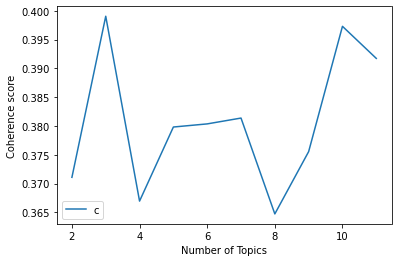

In [25]:
start,stop,step=2,12,1
plot_graph(doc_clean_usa+doc_clean_japan,start,stop,step)